I recently found this heart dataset from the ISL book on R. (It is also on **[Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)**.) I did my final project to complete my Data Science program on a heart failure dataset from UCI (to view this please reference my **[Heart_Failure_FP repository](https://github.com/Mariacodes777/Heart_Failure_FP)**.) I was really interested to do an anlysis on this heart dataset since it contains different clinical features than the one I had previously done. I hope you enjoy this notebook!


In [1]:
import pandas as pd

In [2]:
Heart = pd.read_csv('../../Fun_Projects/HeartMLfromISL/Heart.csv')

In [3]:
Heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- (The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.)
- (From Kaggle)

After viewing the inital couple rows of data, there is an extra "Unnamed" index column so first thing to do will be to drop it.

In [4]:
Heart = Heart.drop('Unnamed: 0', axis = 1)

I like to create a new variable for my data so if I make a mistake I can revert back to the original data. So here I'll be using Heart1.

In [5]:
Heart1 = Heart

I'll start off by recoding to prepare for analysis.

In [6]:
Heart.ChestPain.value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [7]:
Heart1.replace(['asymptomatic'], 1, inplace = True)
Heart1.replace(['nonanginal'], 2, inplace = True)
Heart1.replace(['nontypical'], 3, inplace = True)
Heart1.replace(['typical'], 4, inplace= True)

In [8]:
Heart.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [9]:
Heart1.replace(['normal'], 1, inplace = True)
Heart1.replace(['reversable'], 2, inplace = True)
Heart1.replace(['fixed'], 3, inplace = True)

In [10]:
Heart1.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,4,145,233,1,2,150,0,2.3,3,0.0,3.0,No
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1.0,Yes
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2.0,Yes
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1.0,No
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1.0,No


In [11]:
Heart1.shape

(303, 14)

In [12]:
# This is a small dataset with only 303 rows and 14 columns.

In [13]:
Heart1.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [14]:
#Making target numeric to prep for analysis

In [15]:
Heart1.replace(['No'], 0, inplace = True)
Heart1.replace(['Yes'], 1, inplace = True)

In [16]:
Heart1.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,4,145,233,1,2,150,0,2.3,3,0.0,3.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1.0,0


Recoding was successful. Now below to view numeric details on each feature.

In [17]:
Heart1.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,1.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,1.508306,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.608904,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [18]:
from skimpy import skim

In [19]:
skim(Heart1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 303    │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Age                 │     0 │        0 │      54 │       9 │     29 │     48 │     61 │      77 │  ▁▄▅█▅▁  │  │
│ │ Sex                 │     0 │        0 │    0.68 │    0.47 │      0 │      0 │      1 │       1 │  ▄    █  │  │
│ │ ChestPain           │     0 │        0 │     1.8 │    0.96 │      1 │      1 │      2 │       4 │  █ ▅ ▃▁  │  │
│ │ RestBP              │     0 │        0 │     130 │      18 │     94 │    120 │    140 │     200 │  ▃▇█▃▁   │  │
│ │ Chol                │     0 │        0 │     250 │      52 │    130 │    210 │    280 │     560 │   ▂█▃    │  │
│ │ Fbs                 │     0 │        0 │    0.15 │    0.36 │      0 │      0 │      0 │       1 │  █    ▁  │  │
│ │ RestECG             │     0 │        0 │    0.99 │    0.99 │      0 │      0 │      2 │       2 │  █    █  │  │
│ │ MaxHR               │     0 │        0 │     150 │      23 │     71 │    130 │    170 │     200 │   ▂▄██▁  │  │
│ │ ExAng               │     0 │        0 │    0.33 │    0.47 │      0 │      0 │      1 │       1 │  █    ▄  │  │
│ │ Oldpeak             │     0 │        0 │       1 │     1.2 │      0 │      0 │    1.6 │     6.2 │   █▃▁▁   │  │
│ │ Slope               │     0 │        0 │     1.6 │    0.62 │      1 │      1 │      2 │       3 │  █  █ ▁  │  │
│ │ Ca                  │     4 │      1.3 │    0.67 │    0.94 │      0 │      0 │      1 │       3 │  █ ▃ ▂▁  │  │
│ │ Thal                │     2 │     0.66 │     1.5 │    0.61 │      1 │      1 │      2 │       3 │  █  ▆ ▁  │  │
│ │ AHD                 │     0 │        0 │    0.46 │     0.5 │      0 │      0 │      1 │       1 │  █    ▇  │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Pandas Profiling provides an extremely detailed look at the data.

In [20]:
from pandas_profiling import ProfileReport

In [21]:
profile = ProfileReport(Heart1, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
#Looking at heatmap in larger view 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

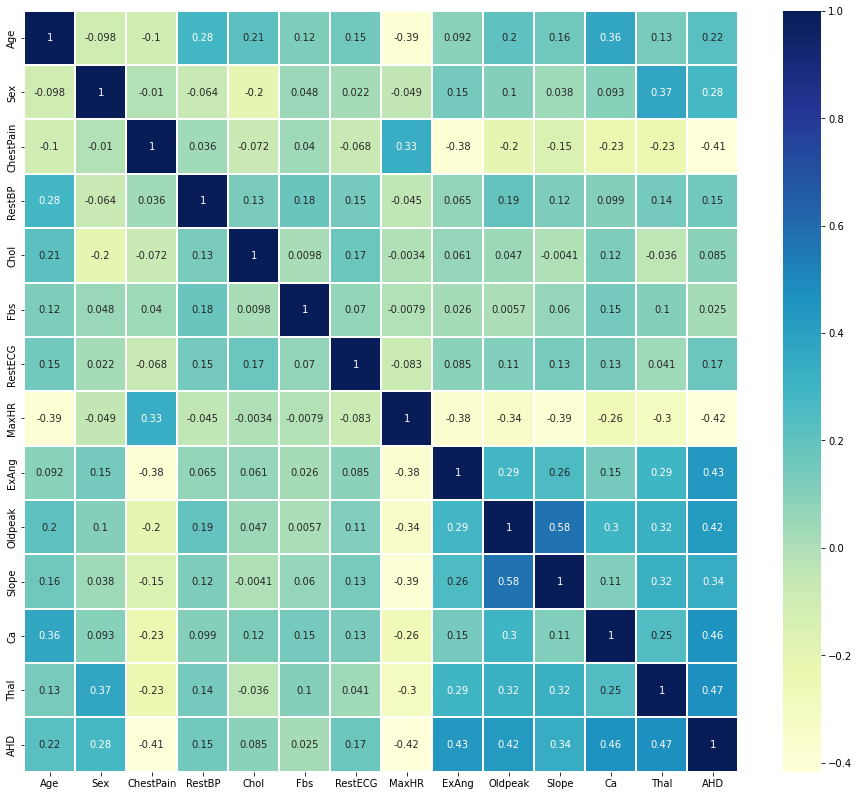

In [24]:
plt.figure(figsize=(16,14))
sns.heatmap(Heart1.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Heart2 = Heart1

In [27]:
Heart2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    float64
 13  AHD        303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [28]:
Heart2.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

There were a few rows with NA values, dropping them here.

In [29]:
Heart2.dropna(inplace = True)

In [30]:
Heart2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,4,145,233,1,2,150,0,2.3,3,0.0,3.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2.0,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1.0,0


In [31]:
X = Heart2.drop(columns=['AHD'])

In [76]:
# Below is my favorite way to view each variable against the target to see the data distribution.
# Thank you to Dr. Lumian for teaching me this!

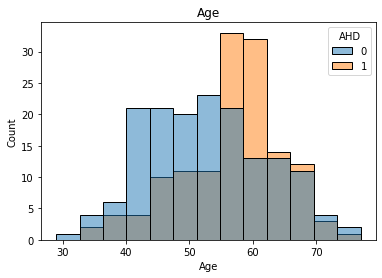

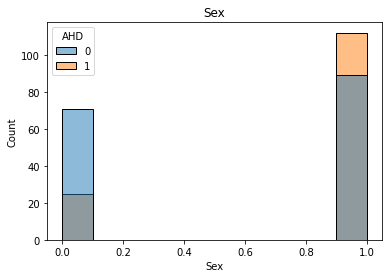

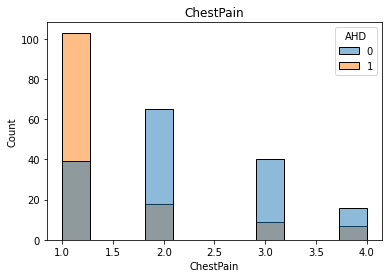

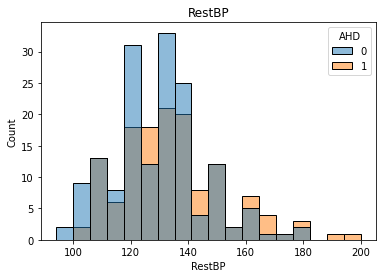

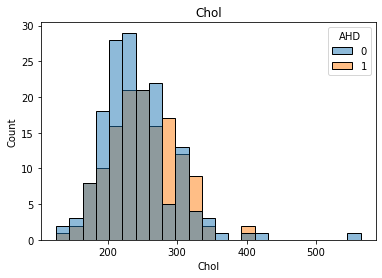

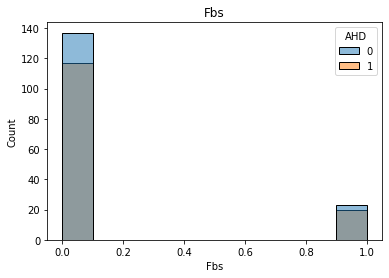

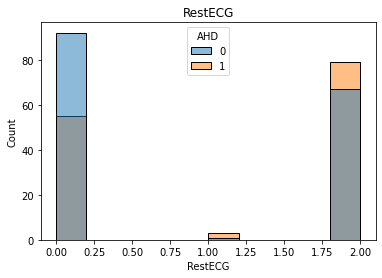

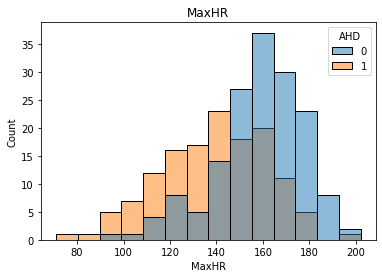

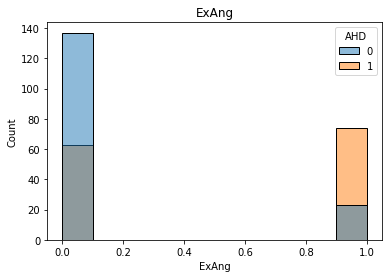

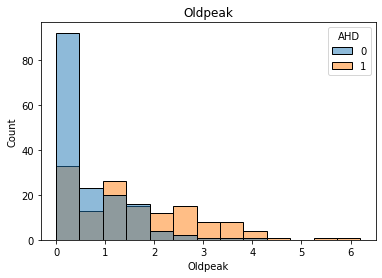

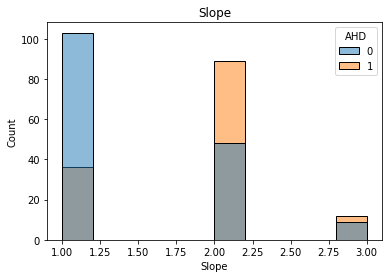

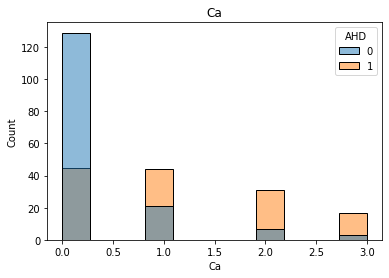

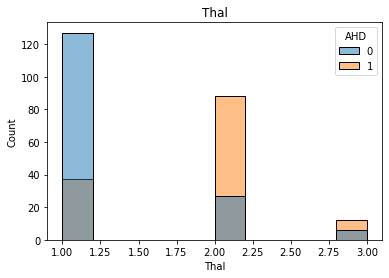

<Figure size 432x288 with 0 Axes>

In [33]:
for ex in X:
    sns.histplot(x=Heart2[ex], hue=Heart2['AHD']).set(title=ex)
    plt.figure()

In [34]:
X.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')

In [35]:
y = Heart2.AHD

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# scaling the data

In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
X_test_scaled = scaler.transform(X_test)

In [44]:
logreg = LogisticRegression()

In [45]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
y_pred = logreg.predict(X_test_scaled)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [48]:
score = accuracy_score(y_test, y_pred)
result = (score * 100)
print(result)


82.22222222222221


In [49]:
print("Accuracy of Logistic Regression:", result, '\n')
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression: 82.22222222222221 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        49
           1       0.86      0.73      0.79        41

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.83      0.82      0.82        90



In [50]:
# Model has an accuracy score of 82%

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


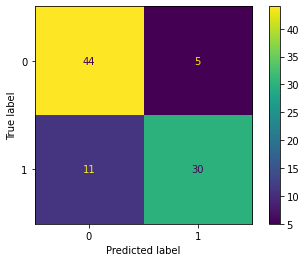

In [52]:
plot_confusion_matrix(logreg, X_test_scaled, y_test)
plt.show()

In [53]:
# Since the above will be deprecated, here below I'll show it this way instead and make it purple:)

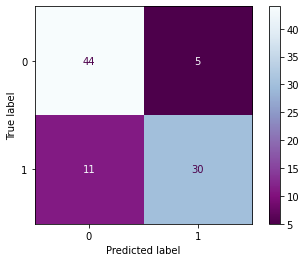

In [54]:
predicted_labels = logreg.predict(X_test_scaled)
cm=confusion_matrix(y_test, predicted_labels, labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.BuPu_r)
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        49
           1       0.86      0.73      0.79        41

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.83      0.82      0.82        90



In [56]:
# Now running a random forest model:

In [57]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [58]:
RF.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [59]:
RF_y_pred = RF.predict(X_test_scaled)

In [60]:
accuracy = accuracy_score(y_test, RF_y_pred)
result2 = (accuracy * 100)
print(result2)

85.55555555555556


Model is 85% accurate.

Below, plotting the confusion matrix from the random forest model in comparison:

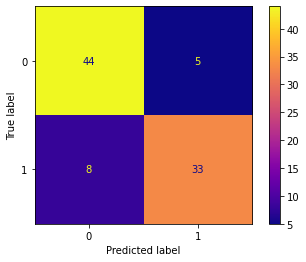

In [61]:
PR = RF.predict(X_test_scaled)
CM=confusion_matrix(y_test, PR, labels=RF.classes_)
DISP=ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=RF.classes_)
DISP.plot(cmap=plt.cm.plasma)
plt.show()

In [62]:

def plot_tree(est_num=0):
    plt.figure(figsize=(17,10))
    feature_names=X.columns
    class_names=y.unique().astype(str)
    tree.plot_tree(RF.estimators_[est_num],
                   feature_names = X.columns, 
                   class_names = y.unique().astype(str),
                   filled = True, fontsize=12, max_depth=3)

In [63]:
RF.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

Looking at a sample of the trees:

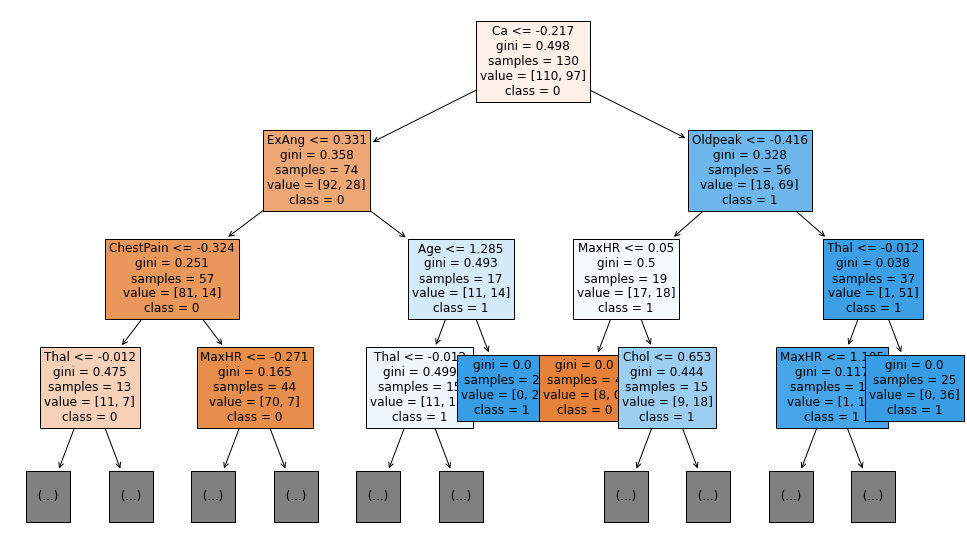

In [64]:
plot_tree(est_num=1)

Examining the influential features:

In [65]:
RF.feature_importances_

array([0.08783188, 0.04216438, 0.10893471, 0.08910024, 0.08902245,
       0.00990926, 0.01893788, 0.12562307, 0.04395361, 0.10532934,
       0.029579  , 0.14691195, 0.10270222])

In [66]:
features = pd.DataFrame(Heart2.drop(columns=['AHD']).columns, RF.feature_importances_)

In [67]:
features['Value']=features.index

In [68]:
features.columns

Index([0, 'Value'], dtype='object')

In [69]:
features.index=features[0]

Below shows the feature importance with the greatest influential features going from left to right.

<AxesSubplot:xlabel='0'>

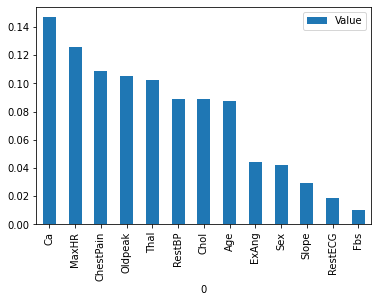

In [70]:
features_sorted = features.sort_values(ascending=False, by='Value')
features_sorted.plot(kind='bar')

Here we see that Ca, MaxHR, and ChestPain are the top influential variables in this model.

In [71]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]


Looking at the ROC:

In [72]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


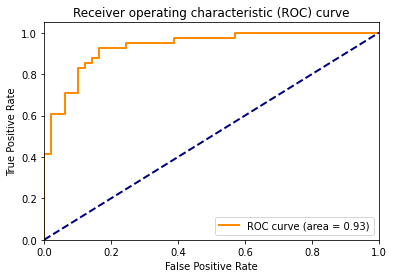

In [73]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

This is showing a very high 93% of predicting accurately true positives.

In [74]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_pred_proba)
roc_score


0.9337979094076655

In [75]:
# I would like to reference a thank you to Dr. Lumian, whose work has greatly influenced me with this notebook.
# Also, grateful for ChatGPT and datacamp's scikit-learn class which was also very helpful in creating 
# this notebook. As well as being influenced by NARESHA BHAT's public notebook on kaggle on this dataset.